In [1]:
import itertools
import pandas as pd
from modules.eval import *

In [2]:
dft_forces_mace = load('results/mace/dft_forces.pkl')
dft_energies_mace = load('results/mace/dft_energies.pkl')
predicted_forces_mace = load('results/mace/predicted_forces.pkl')
predicted_energies_mace = load('results/mace/predicted_energies.pkl')

dft_forces_orb = load('results/orb/dft_forces.pkl')
dft_energies_orb = load('results/orb/dft_energies.pkl')
predicted_forces_orb = load('results/orb/predicted_forces.pkl')
predicted_energies_orb = load('results/orb/predicted_energies.pkl')

dft_forces_deep = load('results/deepmd/dft_forces.pkl')
dft_energies_deep = load('results/deepmd/dft_energies.pkl')
predicted_forces_deep = load('results/deepmd/predicted_forces.pkl')
predicted_energies_deep = load('results/deepmd/predicted_energies.pkl')

dft_forces_grace = load('results/grace/dft_forces.pkl')
dft_energies_grace = load('results/grace/dft_energies.pkl')
predicted_forces_grace = load('results/grace/predicted_forces.pkl')
predicted_energies_grace = load('results/grace/predicted_energies.pkl')

In [3]:
plt.rcParams["font.family"] = "Georgia"

### Energies

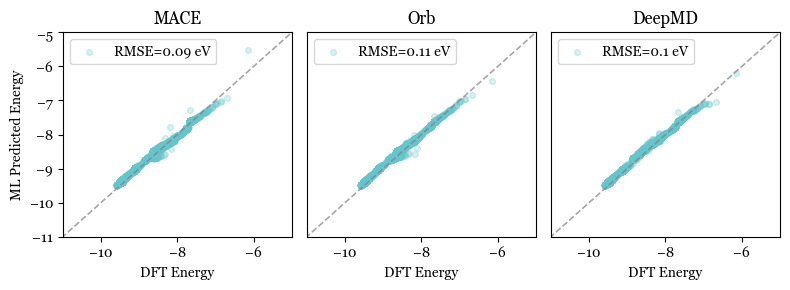

In [4]:
plt.figure(figsize=(8,3))

plt.subplot(131)
plt.title('MACE')
parity_plot(np.array(dft_energies_mace),np.array(predicted_energies_mace),'Energy','eV')
plt.xlim(-11,-5),plt.ylim(-11,-5)

plt.subplot(132)
plt.title('Orb')
parity_plot(np.array(dft_energies_orb),np.array(predicted_energies_orb),'Energy','eV')
plt.ylabel(''),plt.yticks([]),plt.xlim(-11,-5),plt.ylim(-11,-5)

plt.subplot(133)
plt.title('DeepMD')
parity_plot(np.array(dft_energies_deep),np.array(predicted_energies_deep),'Energy','eV')
plt.ylabel(''),plt.yticks([]),plt.xlim(-11,-5),plt.ylim(-11,-5)

plt.tight_layout()
plt.show()

In [5]:
r2_mace,mae_mace,rmse_mace = eval_report(np.array(dft_energies_mace),np.array(predicted_energies_mace))
r2_orb,mae_orb,rmse_orb = eval_report(np.array(dft_energies_orb),np.array(predicted_energies_orb))
r2_deep,mae_deep,rmse_deep = eval_report(np.array(dft_energies_deep),np.array(predicted_energies_deep))
r2_grace,mae_grace,rmse_grace = eval_report(np.array(dft_energies_grace),np.array(predicted_energies_grace))

print('Model\tRMSE\tMAE\tR2')
print(14 * '--')
print('MACE\t%.2f\t%.2f\t%4f'%(rmse_mace,mae_mace,r2_mace))
print('Orb\t%.2f\t%.2f\t%4f'%(rmse_orb,mae_orb,r2_orb))
print('DeepMD\t%.2f\t%.2f\t%.4f'%(rmse_deep,mae_deep,r2_deep))
print('Grace\t%.2f\t%.2f\t%.4f'%(rmse_grace,mae_grace,r2_grace))

Model	RMSE	MAE	R2
----------------------------
MACE	0.09	0.09	0.957527
Orb	0.11	0.10	0.943004
DeepMD	0.10	0.10	0.9493
Grace	0.10	0.10	0.9475


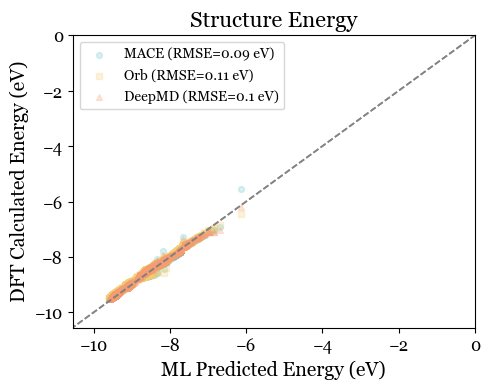

In [6]:
plt.figure(figsize=(5,4))
parity_plot(np.array(dft_energies_mace),np.array(predicted_energies_mace),'Energy','eV',model='MACE')
parity_plot(np.array(dft_energies_orb),np.array(predicted_energies_orb),'Energy','eV',style=1,model='Orb')
parity_plot(np.array(dft_energies_deep),np.array(predicted_energies_deep),'Energy','eV',style=2,model='DeepMD')
plt.xlim(1.1*min(dft_energies_mace),0),plt.ylim(1.1*min(dft_energies_mace),0)
plt.title('Structure Energy',fontsize=16)
plt.xlabel('ML Predicted Energy (eV)',fontsize=14),plt.ylabel('DFT Calculated Energy (eV)',fontsize=14)
plt.xticks(fontsize=12),plt.yticks(fontsize=12)

plt.tight_layout()
# plt.savefig('figures/2_energies.svg',format='svg')
plt.show()

# plt.figure(figsize=(5,4))
# parity_plot(np.array(dft_energies),np.array(predicted_energies_mace),'Energy','eV',model='MACE')
# parity_plot(np.array(dft_energies),np.array(predicted_energies_orb),'Energy','eV',style=1,model='Orb')
# plt.xlim(-3000,0),plt.ylim(-3000,0)
# plt.show()

### Forces

In [7]:
force_module_dft_mace,force_x_dft_mace,force_y_dft_mace,force_z_dft_mace = forces_load(dft_forces_mace)
force_module_mace,force_x_mace,force_y_mace,force_z_mace = forces_load(predicted_forces_mace)

force_module_dft_orb,force_x_dft_orb,force_y_dft_orb,force_z_dft_orb = forces_load(dft_forces_orb)
force_module_orb,force_x_orb,force_y_orb,force_z_orb = forces_load(predicted_forces_orb)

force_module_dft_deep,force_x_dft_deep,force_y_dft_deep,force_z_dft_deep = forces_load(dft_forces_deep)
force_module_deep,force_x_deep,force_y_deep,force_z_deep = forces_load(predicted_forces_deep)

In [8]:
r2_mace,mae_mace,rmse_mace = eval_report(np.array(force_module_dft_mace),np.array(force_module_mace))
r2_orb,mae_orb,rmse_orb = eval_report(np.array(force_module_dft_orb),np.array(force_module_orb))
r2_deep,mae_deep,rmse_deep = eval_report(np.array(force_module_dft_deep),np.array(force_module_deep))

print('Model\tRMSE\tMAE\tR2')
print(14 * '--')
print('MACE\t%.2f\t%.2f\t%.2f'%(rmse_mace,mae_mace,r2_mace))
print('Orb\t%.2f\t%.2f\t%.2f'%(rmse_orb,mae_orb,r2_orb))
print('DeepMD\t%.2f\t%.2f\t%.2f'%(rmse_deep,mae_deep,r2_deep))

print()
print('Forces X')
r2_mace,mae_mace,rmse_mace = eval_report(np.array(force_x_dft_mace),np.array(force_x_mace))
r2_orb,mae_orb,rmse_orb = eval_report(np.array(force_x_dft_orb),np.array(force_x_orb))
r2_deep,mae_deep,rmse_deep = eval_report(np.array(force_x_dft_deep),np.array(force_x_deep))

print('Model\tRMSE\tMAE\tR2')
print(14 * '--')
print('MACE\t%.2f\t%.2f\t%.2f'%(rmse_mace,mae_mace,r2_mace))
print('Orb\t%.2f\t%.2f\t%.2f'%(rmse_orb,mae_orb,r2_orb))
print('DeepMD\t%.2f\t%.2f\t%.2f'%(rmse_deep,mae_deep,r2_deep))

print()
print('Forces Y')
r2_mace,mae_mace,rmse_mace = eval_report(np.array(force_y_dft_mace),np.array(force_y_mace))
r2_orb,mae_orb,rmse_orb = eval_report(np.array(force_y_dft_orb),np.array(force_y_orb))
r2_deep,mae_fc,rmse_fc = eval_report(np.array(force_y_dft_deep),np.array(force_y_deep))

print('Model\tRMSE\tMAE\tR2')
print(14 * '--')
print('MACE\t%.2f\t%.2f\t%.2f'%(rmse_mace,mae_mace,r2_mace))
print('Orb\t%.2f\t%.2f\t%.2f'%(rmse_orb,mae_orb,r2_orb))
print('DeepMD\t%.2f\t%.2f\t%.2f'%(rmse_deep,mae_deep,r2_deep))

print()
print('Forces Z')
r2_mace,mae_mace,rmse_mace = eval_report(np.array(force_z_dft_mace),np.array(force_z_mace))
r2_orb,mae_orb,rmse_orb = eval_report(np.array(force_z_dft_orb),np.array(force_z_orb))
r2_deep,mae_fc,rmse_fc = eval_report(np.array(force_z_dft_deep),np.array(force_z_deep))

print('Model\tRMSE\tMAE\tR2')
print(14 * '--')
print('MACE\t%.2f\t%.2f\t%.2f'%(rmse_mace,mae_mace,r2_mace))
print('Orb\t%.2f\t%.2f\t%.2f'%(rmse_orb,mae_orb,r2_orb))
print('DeepMD\t%.2f\t%.2f\t%.2f'%(rmse_deep,mae_deep,r2_deep))

Model	RMSE	MAE	R2
----------------------------
MACE	0.71	0.55	0.26
Orb	0.54	0.44	0.45
DeepMD	0.50	0.39	0.64

Forces X
Model	RMSE	MAE	R2
----------------------------
MACE	0.57	0.43	0.26
Orb	0.51	0.39	0.54
DeepMD	0.33	0.27	0.77

Forces Y
Model	RMSE	MAE	R2
----------------------------
MACE	0.81	0.46	-0.02
Orb	0.40	0.24	0.39
DeepMD	0.33	0.27	0.12

Forces Z
Model	RMSE	MAE	R2
----------------------------
MACE	0.20	0.13	0.79
Orb	0.21	0.14	0.81
DeepMD	0.33	0.27	0.69


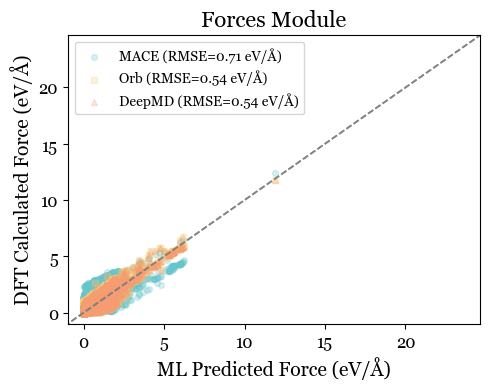

In [9]:
plt.figure(figsize=(5,4))
parity_plot(np.array(force_module_dft_mace),np.array(force_module_mace),'Force','eV/Å',model='MACE')
parity_plot(np.array(force_module_dft_orb),np.array(force_module_orb),'Force','eV/Å',style=1,model='Orb')
parity_plot(np.array(force_module_dft_deep),np.array(force_module_orb),'Force','eV/Å',style=2,model='DeepMD')
plt.xlim(-1,max(np.array(force_module_dft_mace))),plt.ylim(-1,max(np.array(force_module_dft_mace)))

plt.title('Forces Module',fontsize=16)
plt.xlabel('ML Predicted Force (eV/Å)',fontsize=14),plt.ylabel('DFT Calculated Force (eV/Å)',fontsize=14)
plt.xticks(fontsize=12),plt.yticks(fontsize=12)

plt.tight_layout()
# plt.savefig('figures/3_forces_module.svg',format='svg')
plt.show()

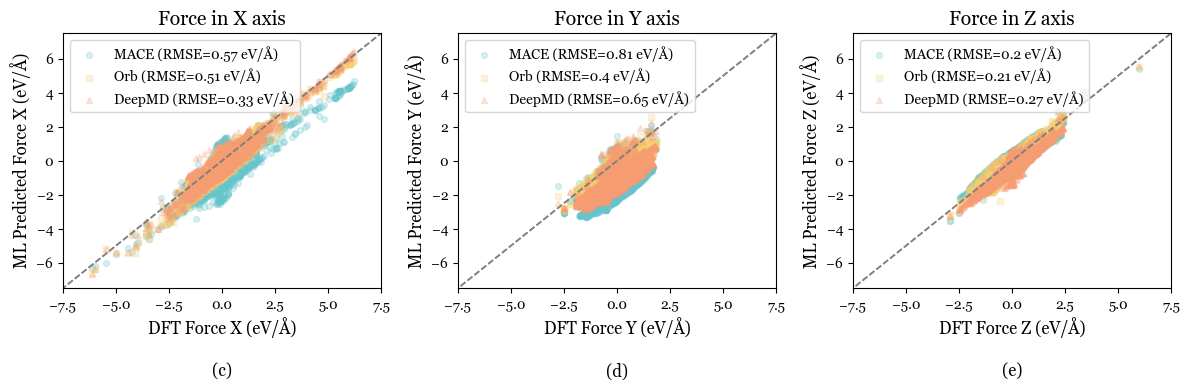

In [10]:
plt.figure(figsize=(12,4))

plt.subplot(131)
parity_plot(np.array(force_x_dft_mace),np.array(force_x_mace),'Force X','eV/Å',model='MACE')
parity_plot(np.array(force_x_dft_deep),np.array(force_x_orb),'Force X','eV/Å',model='Orb',style=1)
parity_plot(np.array(force_x_dft_deep),np.array(force_x_deep),'Force X','eV/Å',model='DeepMD',style=2)
plt.title('Force in X axis',fontsize=14),plt.xlabel('DFT Force X (eV/Å)\n\n(c)',fontsize=12),plt.ylabel('ML Predicted Force X (eV/Å)',fontsize=12)
plt.xlim(-7.5,7.5),plt.ylim(-7.5,7.5)

plt.subplot(132)
parity_plot(np.array(force_y_dft_mace),np.array(force_y_mace),'Force Y','eV/Å',model='MACE')
parity_plot(np.array(force_y_dft_deep),np.array(force_y_orb),'Force Y','eV/Å',model='Orb',style=1)
parity_plot(np.array(force_y_dft_deep),np.array(force_y_deep),'Force Y','eV/Å',model='DeepMD',style=2)
plt.title('Force in Y axis',fontsize=14),plt.xlabel('DFT Force Y (eV/Å)\n\n(d)',fontsize=12),plt.ylabel('ML Predicted Force Y (eV/Å)',fontsize=12)
plt.xlim(-7.5,7.5),plt.ylim(-7.5,7.5)
plt.legend(loc='upper left')

plt.subplot(133)

parity_plot(np.array(force_z_dft_mace),np.array(force_z_mace),'Force Z','eV/Å',model='MACE')
parity_plot(np.array(force_z_dft_deep),np.array(force_z_orb),'Force Z','eV/Å',model='Orb',style=1)
parity_plot(np.array(force_z_dft_deep),np.array(force_z_deep),'Force Z','eV/Å',model='DeepMD',style=2)
plt.title('Force in Z axis',fontsize=14),plt.xlabel('DFT Force Z (eV/Å)\n\n(e)',fontsize=12),plt.ylabel('ML Predicted Force Z (eV/Å)',fontsize=12)
plt.xlim(-7.5,7.5),plt.ylim(-7.5,7.5)
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('figures/2_2_forces.png',transparent=True,dpi=600)
plt.show()

### Joined Results

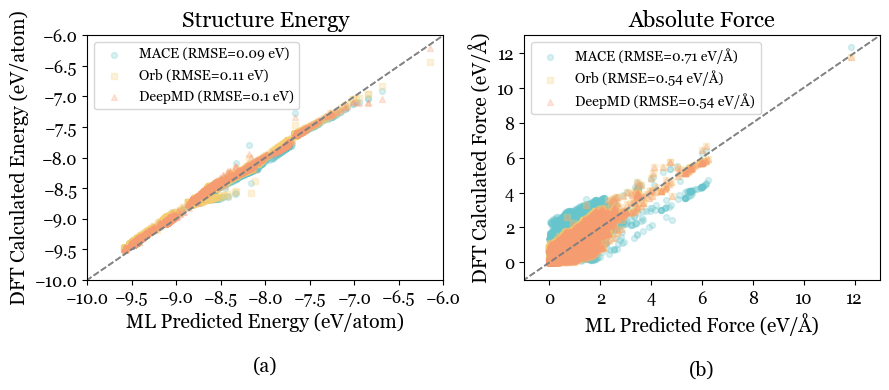

In [13]:
plt.figure(figsize=(9,4))

plt.subplot(121)

parity_plot(np.array(dft_energies_mace),np.array(predicted_energies_mace),'Energy','eV',model='MACE')
parity_plot(np.array(dft_energies_orb),np.array(predicted_energies_orb),'Energy','eV',style=1,model='Orb')
parity_plot(np.array(dft_energies_deep),np.array(predicted_energies_deep),'Energy','eV',style=2,model='DeepMD')
# plt.xlim(1.1*min(dft_energies_mace),0),plt.ylim(1.1*min(dft_energies_mace),0)
plt.title('Structure Energy',fontsize=16)
plt.xlabel('ML Predicted Energy (eV/atom)\n\n(a)',fontsize=14),plt.ylabel('DFT Calculated Energy (eV/atom)',fontsize=14)
plt.xlim(-10,-6),plt.ylim(-10,-6)
plt.xticks(fontsize=12),plt.yticks(fontsize=12)

plt.subplot(122)

parity_plot(np.array(force_module_dft_mace),np.array(force_module_mace),'Force','eV/Å',model='MACE')
parity_plot(np.array(force_module_dft_orb),np.array(force_module_orb),'Force','eV/Å',style=1,model='Orb')
parity_plot(np.array(force_module_dft_deep),np.array(force_module_orb),'Force','eV/Å',style=2,model='DeepMD')
plt.xlim(-1,13),plt.ylim(-1,13)

plt.title('Absolute Force',fontsize=16)
plt.xlabel('ML Predicted Force (eV/Å)\n\n(b)',fontsize=14),plt.ylabel('DFT Calculated Force (eV/Å)',fontsize=14)
plt.xticks(fontsize=12),plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig('figures/2_1_joined_results.png',transparent=True,dpi=600)
plt.show()

### Error Visualization

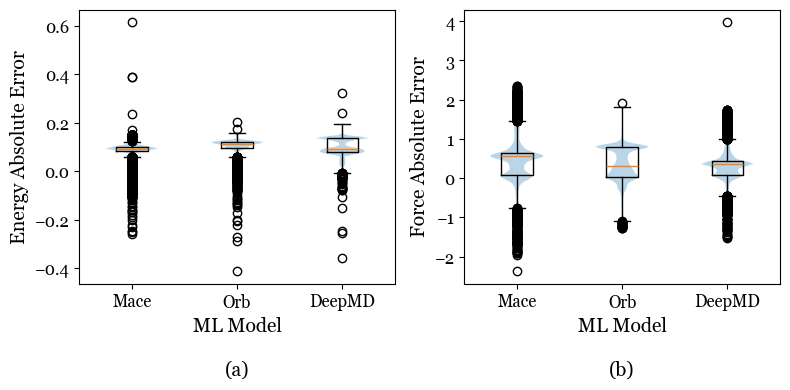

In [38]:
plt.figure(figsize=(8,4))
plt.subplot(121)
error_visualization([
    ['Mace',[dft_energies_mace,predicted_energies_mace]],
    ['Orb',[dft_energies_orb,predicted_energies_orb]],
    ['DeepMD',[dft_energies_deep,predicted_energies_deep]],
])

plt.xlabel('ML Model\n\n(a)',fontsize=14),plt.ylabel('Energy Absolute Error',fontsize=14)
plt.xticks(fontsize=12),plt.yticks(fontsize=12)

plt.subplot(122)
error_visualization([
    ['Mace',[force_module_dft_mace,force_module_mace]],
    ['Orb',[force_module_dft_orb,force_module_orb]],
    ['DeepMD',[force_module_dft_deep,force_module_deep]],
])

plt.xlabel('ML Model\n\n(b)',fontsize=14),plt.ylabel('Force Absolute Error',fontsize=14)
plt.xticks(fontsize=12),plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig('figures/3_error.png',dpi=500,transparent=True)
plt.show()